In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from BanditRec.settings import SimpleSetting, NewsSimulationSetting2
from BanditRec.setting import SettingConfig
from BanditRec.agents import RandomAgent, EpsGreedyAgent, ThompsonAgent, UCBAgent
from BanditRec.simulator import Simulator

import math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def get_ctr(result, tmin=0, tmax=None):
    rewards = result[0]
    if tmax is None:
        tmax = rewards.shape[1]
    
    return rewards[:, tmin:tmax].mean(axis=1).mean()

In [32]:
def ft_swts(sim, window_sizes, tmin=0):
    baseline_oracle = get_ctr(sim.run_oracle(), tmin=tmin)
    baseline_rand = get_ctr(sim.run_agent(RandomAgent, {}, progress=False), tmin=tmin) / baseline_oracle
    baseline_TS = get_ctr(sim.run_agent(ThompsonAgent, {'window_size': None}, progress=False), tmin=tmin) / baseline_oracle
    
    results = []
    for ws in window_sizes:
        res = sim.run_agent(ThompsonAgent, {'window_size': ws}, progress=False)
        results.append(get_ctr(res, tmin=tmin) / baseline_oracle)
        
    plt.scatter(window_sizes, results)
    plt.axhline(baseline_rand, linestyle='--', color='red')
    plt.axhline(baseline_TS, linestyle='--', color='green')
    plt.xlabel('window size')
    plt.ylabel('relative CTR')
    plt.show()
    

def ft_swts_s1():
    setting = SimpleSetting(
        SettingConfig(
            episode_count=1_000, 
            item_count=10, 
            k=1, 
            episode_length=1
        ),
        evolution_speed=0.01,
    )
    sim = Simulator(run_count=25, seed_change_interval=1)
    sim.set_setting(setting)
    
    for es in [1, 10, 100]:
        sim.set_episode_length(es)
        ft_swts(sim, np.linspace(1, 1000*es*1.2, 50))
        
def ft_swtw_s2():
    setting = NewsSimulationSetting2(
        SettingConfig(
            episode_count=2000, 
            item_count=300, 
            k=3, 
            episode_length=1
        ),
        lifetime=900,
        ctr_base=0.1,
        ctr_fuzz=0.04,
        sigma_base=0.001,
        sigma_fuzz=0.0005,
        smoothing=120,
        global_evolution=2
    )
    sim = Simulator(run_count=10, seed_change_interval=1)
    sim.set_setting(setting)
    
    for es in [1, 10]:
        sim.set_episode_length(es)
        ft_swts(sim, np.linspace(1, 900*3*es*1.2, 20), tmin=1000)
        
def ft_wts(sim, learning_rates, tmin=0):
    baseline_oracle = get_ctr(sim.run_oracle(), tmin=tmin)
    baseline_rand = get_ctr(sim.run_agent(RandomAgent, {}, progress=False), tmin=tmin) / baseline_oracle
    baseline_TS = get_ctr(sim.run_agent(ThompsonAgent, {'window_size': None}, progress=False), tmin=tmin) / baseline_oracle
    
    results = []
    for lr in learning_rates:
        res = sim.run_agent(ThompsonAgent, {'average_type': 'weighted', 'learning_rate': lr}, progress=False)
        results.append(get_ctr(res, tmin=tmin) / baseline_oracle)
    
    plt.xscale('log')
    plt.scatter(learning_rates, results)
    plt.axhline(baseline_rand, linestyle='--', color='red')
    plt.axhline(baseline_TS, linestyle='--', color='green')
    plt.xlabel('learning rate')
    plt.ylabel('relative CTR')
    plt.show()
    
def ft_wts_s1():
    setting = SimpleSetting(
        SettingConfig(
            episode_count=1_000, 
            item_count=10, 
            k=1, 
            episode_length=1
        ),
        evolution_speed=0.01,
    )
    sim = Simulator(run_count=25, seed_change_interval=1)
    sim.set_setting(setting)
    
    for es in [1, 10, 100]:
        sim.set_episode_length(es)
        ft_wts(sim, np.logspace(-4, 0, 50))

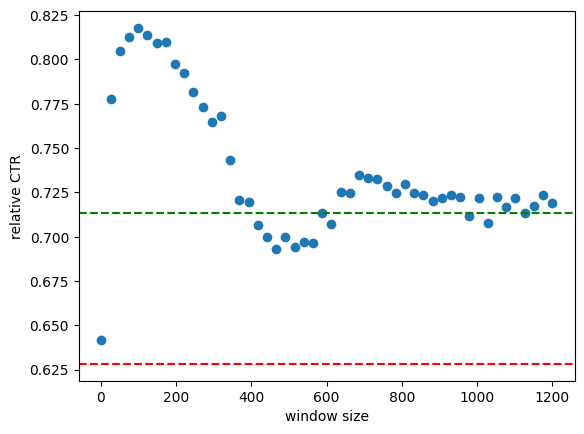

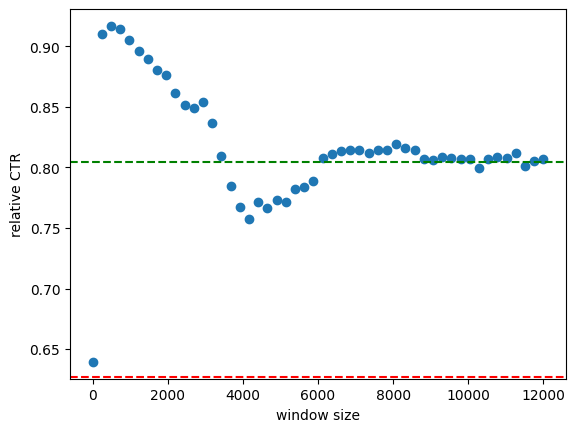

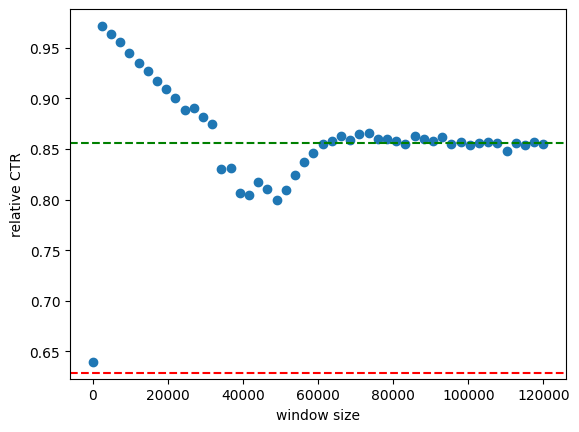

In [21]:
ft_swts_s1()

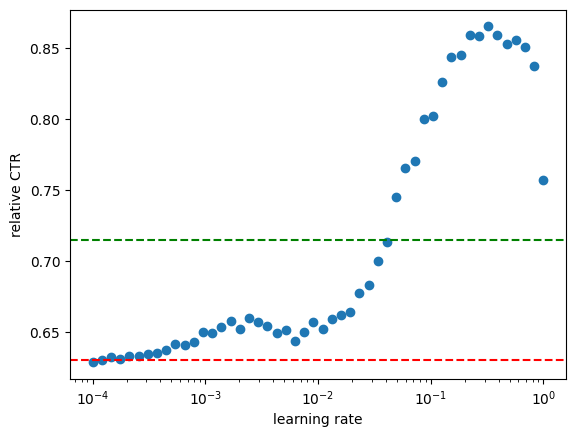

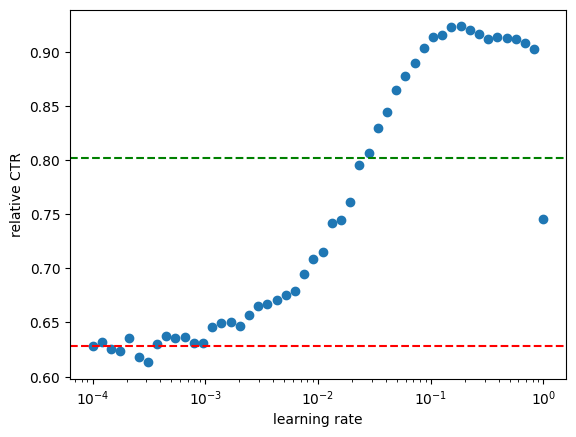

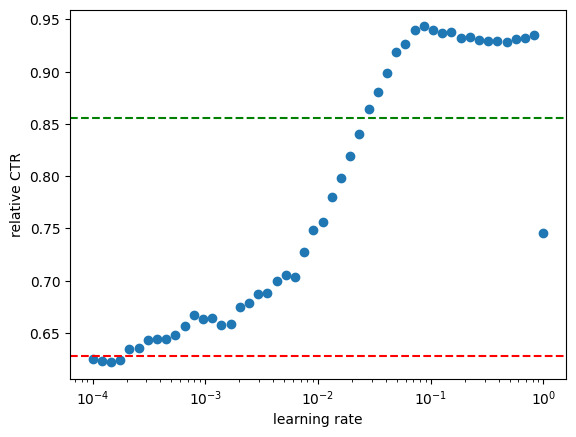

In [14]:
ft_wts_s1()

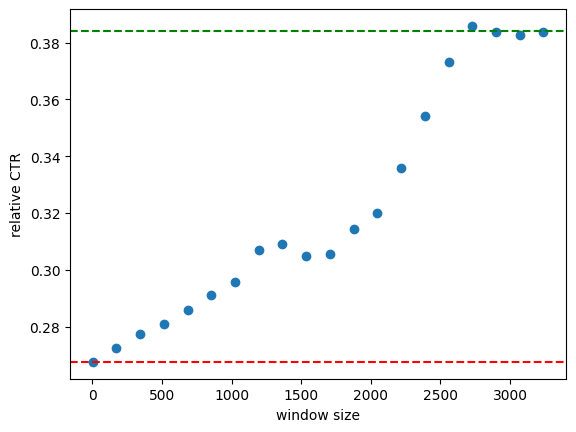

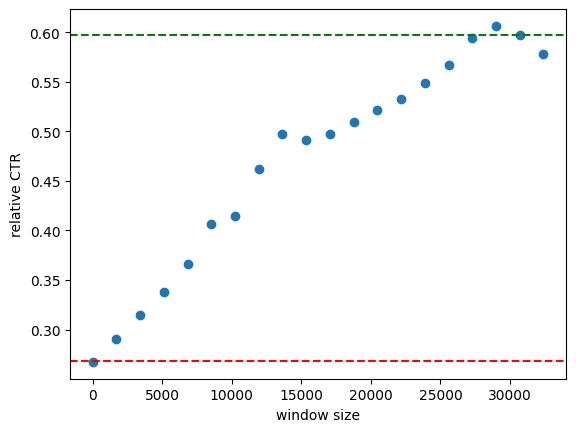

In [33]:
ft_swtw_s2()

In [ ]:
def ft_sweg(sim, window_sizes, eps, tmin=0):
    baseline_oracle = get_ctr(sim.run_oracle(), tmin=tmin)
    baseline_rand = get_ctr(sim.run_agent(RandomAgent, {}, progress=False), tmin=tmin) / baseline_oracle
    baseline_EG = get_ctr(sim.run_agent(EpsGreedyAgent, {'eps': eps, 'lr': None, 'ws': None}, progress=False), tmin=tmin) / baseline_oracle
    
    results = []
    for ws in window_sizes:
        res = sim.run_agent(EpsGreedyAgent, {'eps': eps, 'lr': None, 'ws': ws}, progress=False)
        results.append(get_ctr(res, tmin=tmin) / baseline_oracle)
        
    plt.scatter(window_sizes, results)
    plt.axhline(baseline_rand, linestyle='--', color='red')
    plt.axhline(baseline_EG, linestyle='--', color='green')
    plt.xlabel('window size')
    plt.ylabel('relative CTR')
    plt.show()
    

def ft_sweg_s1():
    setting = SimpleSetting(
        SettingConfig(
            episode_count=1_000, 
            item_count=10, 
            k=1, 
            episode_length=1
        ),
        evolution_speed=0.01,
    )
    sim = Simulator(run_count=25, seed_change_interval=1)
    sim.set_setting(setting)
    
    for es in [10]:
        sim.set_episode_length(es)
        ft_sweg(sim, np.linspace(1, 1000*es*1.2, 50), 0.1/es)
        
def ft_weg(sim, learning_rates, eps, tmin=0):
    baseline_oracle = get_ctr(sim.run_oracle(), tmin=tmin)
    baseline_rand = get_ctr(sim.run_agent(RandomAgent, {}, progress=False), tmin=tmin) / baseline_oracle
    baseline_EG = get_ctr(sim.run_agent(EpsGreedyAgent, {'eps': eps, 'lr': None, 'ws': None}, progress=False), tmin=tmin) / baseline_oracle
    
    results = []
    for lr in learning_rates:
        res = sim.run_agent(EpsGreedyAgent, {'eps': eps, 'lr': lr, 'ws': None}, progress=False)
        results.append(get_ctr(res, tmin=tmin) / baseline_oracle)
    
    plt.xscale('log')
    plt.scatter(learning_rates, results)
    plt.axhline(baseline_rand, linestyle='--', color='red')
    plt.axhline(baseline_EG, linestyle='--', color='green')
    plt.xlabel('learning rate')
    plt.ylabel('relative CTR')
    plt.show()
    
def ft_weg_s1():
    setting = SimpleSetting(
        SettingConfig(
            episode_count=1_000, 
            item_count=10, 
            k=1, 
            episode_length=1
        ),
        evolution_speed=0.01,
    )
    sim = Simulator(run_count=25, seed_change_interval=1)
    sim.set_setting(setting)
    
    for es in [10]:
        sim.set_episode_length(es)
        ft_weg(sim, np.logspace(-4, 0, 50), 0.1/es)

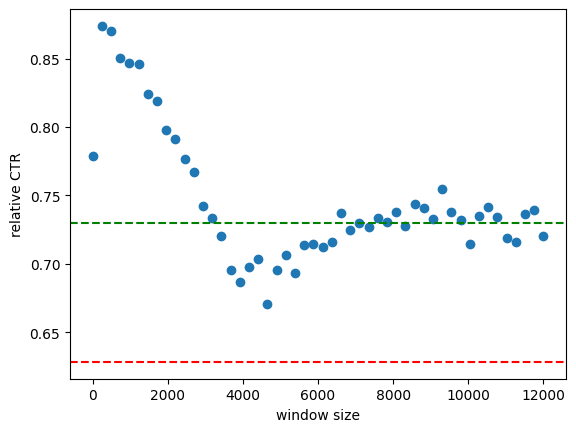

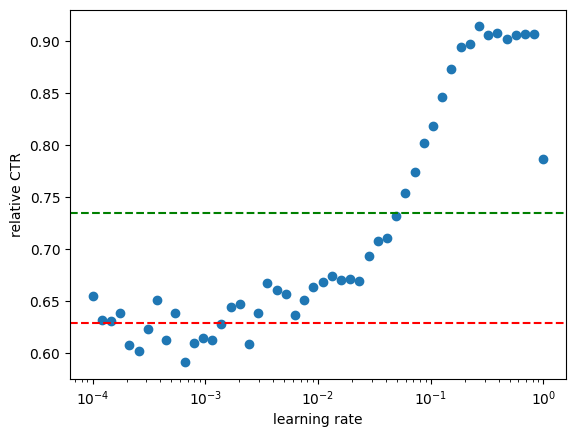

In [8]:
ft_sweg_s1()
ft_weg_s1()

In [4]:
# TS: -
# SW-TS: 100 / 500 / 2500
# W-TS: 0.3 / 0.2 / 0.1
# EG: 0.1 / 0.01 / 0.001
# SW-EG: 100 / 500 /
# W-EG: 0.3 / 0.3

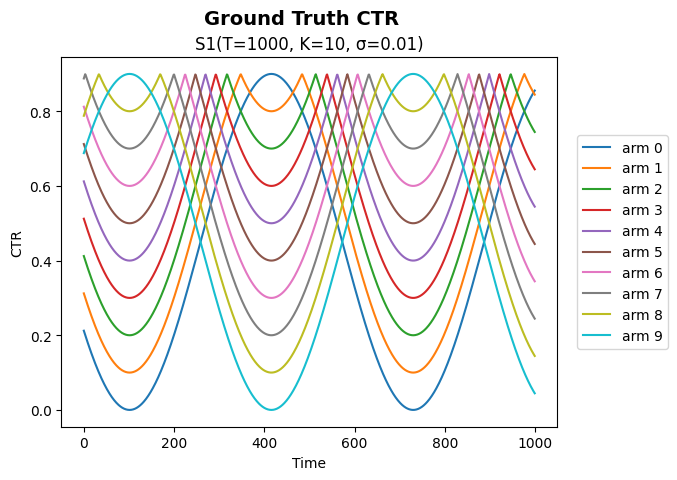

 S1(T=1000, K=10, σ=0.01) 
$0.627 \pm 0.002$ & Random 
$0.715 \pm 0.005$ & TS() 
$0.815 \pm 0.002$ & SW-TS(ws=100) 
$0.857 \pm 0.004$ & W-TS(lr=0.3) 
$0.709 \pm 0.010$ & EG(eps=0.1) 
$0.822 \pm 0.004$ & SW-EG(eps=0.1, ws=100) 
$0.841 \pm 0.005$ & EG(eps=0.1, lr=0.3, q0=None) 
$0.874 \pm 0.003$ & EG(eps=0, lr=0.1, q0=1.0) 
$0.874 \pm 0.004$ & EG(eps=0, lr=0.1, q0=0.9) 



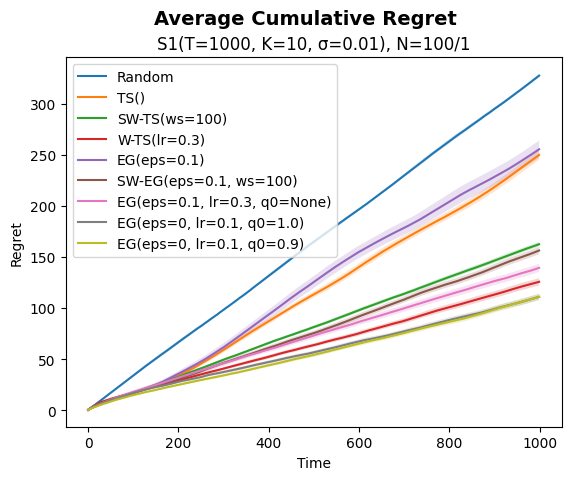

In [28]:
def experiment1():
    setting = SimpleSetting(
        SettingConfig(
            episode_count=1_000, 
            item_count=10, 
            k=1, 
            episode_length=1
        ),
        evolution_speed=0.01,
    )
    setting.visualize()
    
    sim = Simulator(run_count=100, seed_change_interval=1)
    sim.set_setting(setting)
    
    sim.set_episode_length(1)
    sim.run_oracle()
    sim.run_agent(RandomAgent, {}, progress=False)
    sim.run_agent(ThompsonAgent, {'window_size': None}, progress=False)
    sim.run_agent(ThompsonAgent, {'window_size': 100}, progress=False)
    sim.run_agent(ThompsonAgent, {'average_type': 'weighted', 'learning_rate': 0.3}, progress=False)
    sim.run_agent(EpsGreedyAgent, {'eps': 0.1, 'lr': None}, progress=False)
    sim.run_agent(EpsGreedyAgent, {'eps': 0.1, 'lr': None, 'ws': 100}, progress=False)
    sim.run_agent(EpsGreedyAgent, {'eps': 0.1, 'lr': 0.3}, progress=False)
    sim.run_agent(EpsGreedyAgent, {'eps': 0, 'lr': 0.1, 'q0': 1.0}, progress=False)
    sim.run_agent(EpsGreedyAgent, {'eps': 0, 'lr': 0.1, 'q0': 0.9}, progress=False)

    
#     sim.set_episode_length(10)
#     sim.run_oracle()
#     sim.run_agent(RandomAgent, {}, progress=False)
#     sim.run_agent(ThompsonAgent, {'window_size': None}, progress=False)
#     sim.run_agent(ThompsonAgent, {'window_size': 500}, progress=False)
#     sim.run_agent(ThompsonAgent, {'average_type': 'weighted', 'learning_rate': 0.2}, progress=False)
#     sim.run_agent(EpsGreedyAgent, {'eps': 0.01, 'lr': None, 'ws': None}, progress=False)
#     sim.run_agent(EpsGreedyAgent, {'eps': 0.01, 'lr': 0.3, 'ws': None}, progress=False)
#     sim.run_agent(EpsGreedyAgent, {'eps': 0.01, 'lr': None, 'ws': 500}, progress=False)
#     sim.run_agent(EpsGreedyAgent, {'eps': 0, 'lr': 0.01, 'ws': None, 'q0': 1.0}, progress=False)
    
#     sim.set_episode_length(100)
#     sim.run_oracle()
#     sim.run_agent(RandomAgent, {}, progress=False)
#     sim.run_agent(ThompsonAgent, {'window_size': None}, progress=False)
#     sim.run_agent(ThompsonAgent, {'window_size': 2500}, progress=False)
#     sim.run_agent(ThompsonAgent, {'average_type': 'weighted', 'learning_rate': 0.1}, progress=False)
#     sim.run_agent(EpsGreedyAgent, {'eps': 0.001, 'lr': None}, progress=False)
#     sim.run_agent(EpsGreedyAgent, {'eps': 0.001, 'lr': 0.3, 'ws': None}, progress=False)
#     sim.run_agent(EpsGreedyAgent, {'eps': 0.001, 'lr': None, 'ws': 2500}, progress=False)
#     sim.run_agent(EpsGreedyAgent, {'eps': 0, 'lr': 0.001, 'ws': None, 'q0': 1.0}, progress=False)
    
    sim.results.ctrs(relative=True, sort=False, latex=True)
    sim.results.create_regret_plot()
    
experiment1()